# Análise de Vendas

### Importando Bibliotecas

In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

### Juntando dados dos 12 meses em um único arquivo csv

In [14]:
files = [file for file in os.listdir("./Sales_Data")]

year = pd.DataFrame()  #Create an empty DataFrame

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    year = pd.concat([year, df])

year.to_csv("all_data.csv", index=False)

### Lendo arquivo csv do ano completo

In [16]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Filtrando dados

#### Limpando as linhas com dados indesejáveis

##### Retirando linhas NaN

In [18]:
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')

##### Retirando 'Or' da tabela

In [19]:
all_data = all_data[all_data['Order Date'].str[:2] != 'Or']

##### Alterando formato dos dados

In [21]:
pd.options.display.float_format = '${:,.2f}'.format
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

##### Adicionando Colunas para mês e Lucro

In [24]:
all_data['Month'] = all_data['Order Date'].str[:2]
all_data['Month'] = pd.to_numeric(all_data['Month'])
all_data['Profit'] = all_data['Quantity Ordered'] * all_data['Price Each']

##### Para melhorar a vizualização da tabela, a ordem de algumas colunas foram alteradas

In [26]:
cols = list(all_data.columns)
all_data = all_data[cols[0:4] + [cols[-1]] + cols[4:7]]

In [38]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Month,Profit,Order Date,Purchase Address,City,Time
0,176558,USB-C Charging Cable,2,$11.95,4,$23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001","Dallas, TX",08:46
2,176559,Bose SoundSport Headphones,1,$99.99,4,$99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215","Boston, MA",22:30
3,176560,Google Phone,1,$600.00,4,$600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA",14:38
4,176560,Wired Headphones,1,$11.99,4,$11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA",14:38
5,176561,Wired Headphones,1,$11.99,4,$11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001","Los Angeles, CA",09:27
6,176562,USB-C Charging Cable,1,$11.95,4,$11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016","San Francisco, CA",13:03
7,176563,Bose SoundSport Headphones,1,$99.99,4,$99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101","Seattle, WA",07:46
8,176564,USB-C Charging Cable,1,$11.95,4,$11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301","Atlanta, GA",10:58
9,176565,Macbook Pro Laptop,1,"$1,700.00",4,"$1,700.00",04/24/19 10:38,"915 Willow St, San Francisco, CA 94016","San Francisco, CA",10:38
10,176566,Wired Headphones,1,$11.99,4,$11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215","Boston, MA",14:05


### Vendas por mês

In [28]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Profit
Month,,,
1,10903,"$1,811,768.38","$1,822,256.73"
2,13449,"$2,188,884.72","$2,202,022.42"
3,17005,"$2,791,207.83","$2,807,100.38"
4,20558,"$3,367,671.02","$3,390,670.24"
5,18667,"$3,135,125.13","$3,152,606.75"
6,15253,"$2,562,025.61","$2,577,802.26"
7,16072,"$2,632,539.56","$2,647,775.76"
8,13448,"$2,230,345.42","$2,244,467.88"
9,13109,"$2,084,992.09","$2,097,560.13"


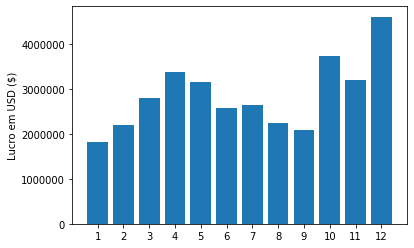

In [30]:
months = range(1,13)
plt.bar(months, results['Profit'])
plt.xticks(months)
plt.ylabel('Lucro em USD ($)')
plt.show()

### Vendas por Cidade

#### Adicionando coluna para cidade

In [31]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)}, {get_state(x)}')

city_sales = all_data.groupby('City').sum()
city_sales['Profit']

City
 Atlanta, GA         $2,795,498.58
 Austin, TX          $1,819,581.75
 Boston, MA          $3,661,642.01
 Dallas, TX          $2,767,975.40
 Los Angeles, CA     $5,452,570.80
 New York City, NY   $4,664,317.43
 Portland, ME          $449,758.27
 Portland, OR        $1,870,732.34
 San Francisco, CA   $8,262,203.91
 Seattle, WA         $2,747,755.48
Name: Profit, dtype: float64

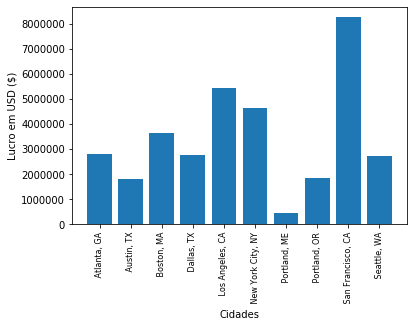

In [32]:
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities, city_sales['Profit'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Lucro em USD ($)')
plt.xlabel('Cidades')
plt.show()

### Vendas por horário

In [35]:
def get_time(time):
    return time.split(' ')[1]
all_data['Time'] = all_data['Order Date'].apply(lambda x: f'{get_time(x)}')

time_sales = all_data.groupby('Time').sum()
time_sales['Quantity Ordered']

Time
00:00     91
00:01     73
00:02     81
00:03    101
00:04     96
        ... 
23:55    113
23:56     79
23:57     96
23:58    104
23:59    108
Name: Quantity Ordered, Length: 1440, dtype: int64

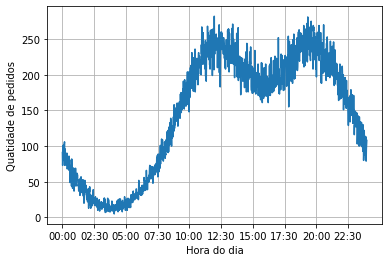

In [37]:
time = [t for t, df in all_data.groupby('Time') ]
plt.plot(time, time_sales['Quantity Ordered'])
plt.xticks(list(range(0, len(time), 150)))
plt.ylabel('Quatidade de pedidos')
plt.xlabel('Hora do dia')
plt.grid()
plt.show()